# Práctico 1 Procesamiento de Imágenes


***

## Grupo Cromático:  
- Clara Quintana	30899597  
- Belen Casalotti	32772856  
- Leandro Bognino	36887290  

## Profesor:  
- Claudio Delrieux  
  Laboratorio de Ciencias de las Imágenes – UNS -CONICET  
  cad@uns.edu.ar

___

### Dependencias e inclusión de librerías

In [1]:
!pip install pillow

In [2]:
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib import cm

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-b8orx83_ because the default path (/home/lborgnino/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Ejercicio 1

## Ejercicio 1.1  
Podríamos llamar alpha al coeficiente de luminancia (si es menor que uno, baja la luminancia, y viceversa), y beta al coeficiente de saturación (si es menor que uno baja la saturación, y viceversa). El workflow a implementar consiste en los siguientes pasos:  
1. Normalizar los valores de RGB del pixel  
2. RGB -> YIQ (utilizando la segunda matriz)  
3. Y’ := aY;
4. I’ := bI;   Q’ := bQ;  
5. Chequear que Y’ <= 1 (para que no se vaya de rango)  
6. Chequear -0.5957 < I’ < 0.5957  y  -0.5226 < Q’ < 0.5226  
7. Y’I’Q’ -> R’G’B’ (el RGB normalizado del pixel procesado)  
8. Convertir R’G’B’ a bytes y graficar el pixel  

### 0. Lectura de imagen

In [3]:
im = Image.open("koala.jpg")
print (im.size, im.mode, im.format)

(1024, 768) RGB JPEG


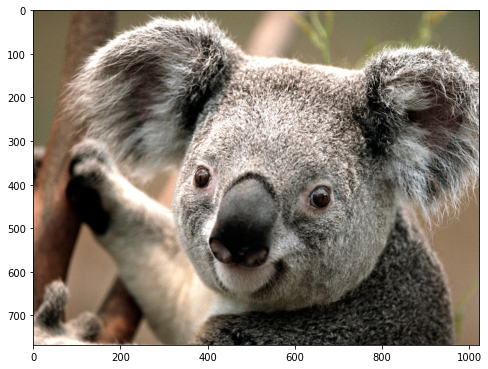

In [4]:
plt.figure(figsize = (8,8))
plt.imshow(im)
plt.show()

### 1. Normalizar los valores de RGB del pixel 

In [5]:
im_np = np.asarray(im)

In [6]:
im_np = im_np/256

### 2. RGB -> YIQ (utilizando la segunda matriz) 

In [7]:
RGB_2_YIQ_MATRIX = np.array([[ 0.299, 0.587, 0.114], 
                          [ 0.595716, -0.274453, -0.321263], 
                          [ 0.211456, -0.522591, 0.311135]])

YIQ_2_RGB_MATRIX = np.array([[1, 0.9663, 0.6210], 
                          [1, -0.2721, -0.6474], 
                          [1, -1.1070, 1.7046]])

In [8]:
im_yiq =  np.copy(im_np)
for i in range(len(im_np)):
    for j in range(len(im_np[0])):
        im_yiq[i][j] = RGB_2_YIQ_MATRIX.dot(im_np[i][j])

#im_yiq = RGB_2_YIQ_MATRIX.dot(im_np)

In [9]:
print(im_yiq.shape)

(768, 1024, 3)


### 3 y 4. Aplicar las siguientes transformaciones: Y’ := aY;  I’ := bI; Q’ := bQ; 
### 5. Chequear que Y’ <= 1 (para que no se vaya de rango)
### 6. Chequear -0.5957 < I’ < 0.5957 y -0.5226 < Q’ < 0.5226

In [10]:
def transformation(image,alpha,beta):
    
    image_transform = np.copy(image)
    
    image_transform[:,:,0] *= alpha
    image_transform[:,:,1] *= beta
    image_transform[:,:,2] *= beta
    
    image_transform[:,:,0][image_transform[:,:,0] > 1] = 1.
    image_transform[:,:,1][image_transform[:,:,1] < -0.5957] = -0.5957
    image_transform[:,:,1][image_transform[:,:,1] > 0.5957] = 0.5957
    image_transform[:,:,2][image_transform[:,:,2] < -0.5226] = -0.5226
    image_transform[:,:,2][image_transform[:,:,2] > 0.5226] = 0.5226
    
    return image_transform

In [11]:
alpha = 0.2
beta = 0.3
im_transf = transformation(im_yiq, alpha, beta)

### 7. Y’I’Q’ -> R’G’B’ (el RGB normalizado del pixel procesado)

In [12]:
image_rgb =  np.copy(im_transf)
for i in range(len(im_transf)):
    for j in range(len(im_transf[0])):
        image_rgb[i][j] = YIQ_2_RGB_MATRIX.dot(im_transf[i][j])

#image_rgb = YIQ_2_RGB_MATRIX.dot(im_transf)

### 8. Convertir R’G’B’ a bytes y graficar el pixel 

In [13]:
image_rgb = Image.fromarray(np.uint8(image_rgb*255))

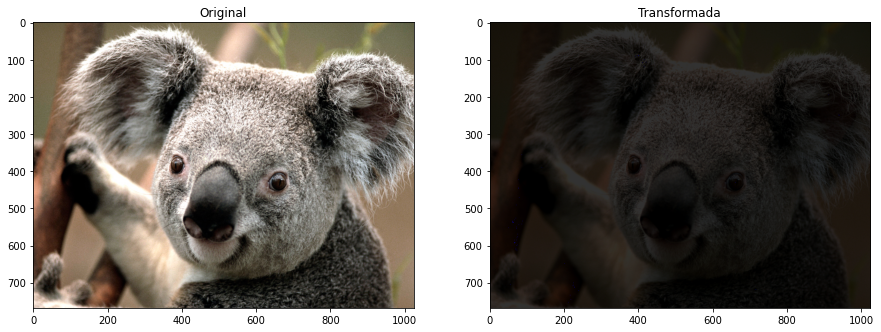

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))

ax1.set_title('Original')
ax1.imshow(im)

ax2.set_title('Transformada')
ax2.imshow(image_rgb)

## Ejercicio 1.2

- Desarrollar un aplicativo que pueda abrir una imagen, manipule su histograma de luminancias, y luego ver la imagen procesada. 
- Se debe poder elegir filtro raíz, cuadrado, o lineal a trozos.Los controles para elegir los filtros los organizan como les resulte más cómodo.

In [15]:
im = Image.open("edificios.jpg")
print (im.size, im.mode, im.format)

(880, 660) RGB JPEG


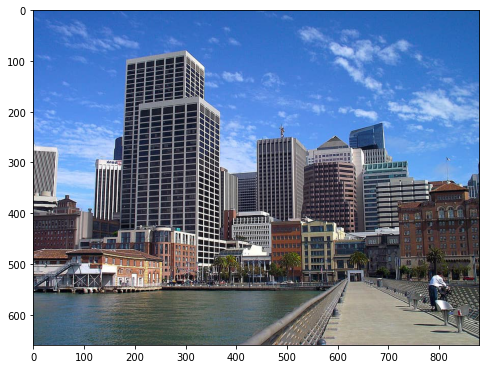

In [16]:
plt.figure(figsize = (8,8))
plt.imshow(im)
plt.show()

In [17]:
im_np = np.asarray(im)
im_np = im_np / 256

In [18]:
def rgb_to_yiq(im_np):
    im_yiq =  np.copy(im_np)
    for i in range(len(im_np)):
        for j in range(len(im_np[0])):
            im_yiq[i][j] = RGB_2_YIQ_MATRIX.dot(im_np[i][j])
    return im_yiq

def yiq_to_rgb(im_yiq):
    im_rgb =  np.copy(im_yiq)
    for i in range(len(im_yiq)):
        for j in range(len(im_yiq[0])):
            im_rgb[i][j] = YIQ_2_RGB_MATRIX.dot(im_yiq[i][j])
    return im_rgb

im_yiq = rgb_to_yiq(im_np)

### Histograma de luminancias (Canal Y)

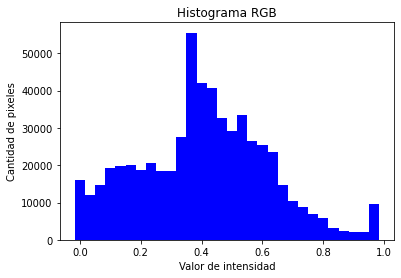

In [19]:
def plot_hist (im_yiq,bins):
    histogram1, bin_edges1 = np.histogram(im_yiq[:,:,0],bins, [0,1] )

    plt.figure()
    plt.title("Histograma RGB")
    plt.xlabel("Valor de intensidad")
    plt.ylabel("Cantidad de pixeles")

    plt.bar(bin_edges1[0:-1], histogram1, 1/len(histogram1),color =['blue'])
    plt.show()
    
plot_hist(im_yiq,30)

### Filtros a aplicar

In [20]:
import math

def apply_filter (image, val, mode = 'square'):
    image_transf = np.copy(image)
    if (mode == 'lineal'):
        image_transf[:,:,0] *= val
        image_transf[:,:,0][image_transf[:,:,0]>1] = 1.
    elif(mode == 'square_root'):
        image_transf[:,:,0] = np.sqrt(image_transf[:,:,0])
    elif(mode == 'square'):
        image_transf[:,:,0] = image_transf[:,:,0]**2
        
    return image_transf

### Aplicación de los filtros, nuevo histograma y nueva imagen

### Original

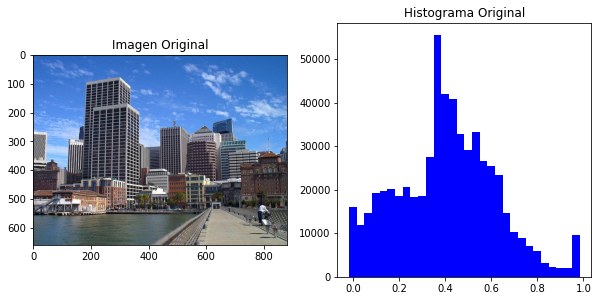

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,12))

ax1.set_title('Imagen Original')
ax1.imshow(im)

ax2.set_title('Histograma Original')
histogram1, bin_edges1 = np.histogram(im_yiq[:,:,0],30, [0,1] )
ax2.bar(bin_edges1[0:-1], histogram1, 1/len(histogram1),color =['blue'])
asp = np.diff(ax2.get_xlim())[0] / np.diff(ax2.get_ylim())[0]
ax2.set_aspect(asp)

### Filtro Lineal Por Trozos

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


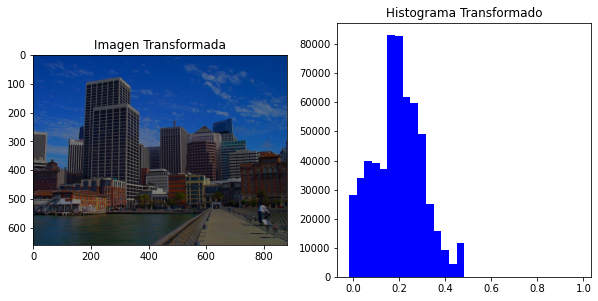

In [22]:
im_transf = apply_filter(im_yiq,0.5,mode='lineal')
histogram1, bin_edges1 = np.histogram(im_transf[:,:,0],30, [0,1] )
image_rgb =  yiq_to_rgb(im_transf)
        
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,12))

ax1.set_title('Imagen Transformada')
ax1.imshow(image_rgb)

ax2.set_title('Histograma Transformado')
ax2.bar(bin_edges1[0:-1], histogram1, 1/len(histogram1),color =['blue'])
asp = np.diff(ax2.get_xlim())[0] / np.diff(ax2.get_ylim())[0]
ax2.set_aspect(asp)

### Filtro cuadrado

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


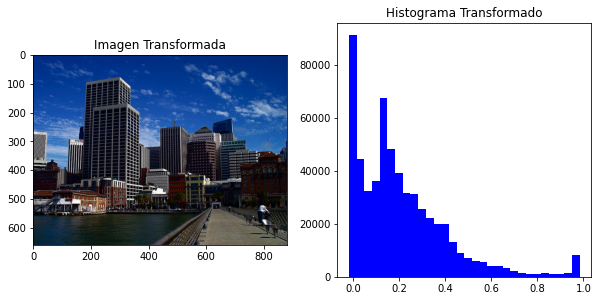

In [23]:
im_transf = apply_filter(im_yiq,0.5,mode='square')
histogram1, bin_edges1 = np.histogram(im_transf[:,:,0],30, [0,1] )
image_rgb =  yiq_to_rgb(im_transf)
        
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,12))

ax1.set_title('Imagen Transformada')
ax1.imshow(image_rgb)

ax2.set_title('Histograma Transformado')
ax2.bar(bin_edges1[0:-1], histogram1, 1/len(histogram1),color =['blue'])
asp = np.diff(ax2.get_xlim())[0] / np.diff(ax2.get_ylim())[0]
ax2.set_aspect(asp)

### Filtro Raíz Cuadrada

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


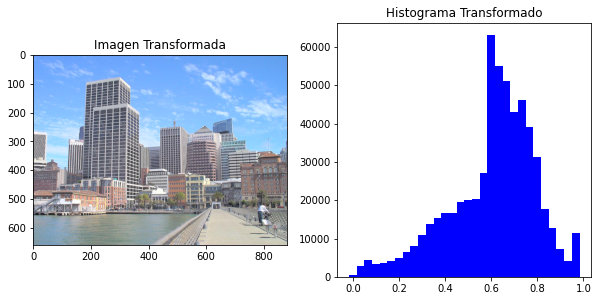

In [24]:
im_transf = apply_filter(im_yiq,0.5,mode='square_root')
histogram1, bin_edges1 = np.histogram(im_transf[:,:,0],30, [0,1] )
image_rgb =  yiq_to_rgb(im_transf)
        
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,12))

ax1.set_title('Imagen Transformada')
ax1.imshow(image_rgb)

ax2.set_title('Histograma Transformado')
ax2.bar(bin_edges1[0:-1], histogram1, 1/len(histogram1),color =['blue'])
asp = np.diff(ax2.get_xlim())[0] / np.diff(ax2.get_ylim())[0]
ax2.set_aspect(asp)